# Check no taper

Compare the real GW event runs performed with NRTidalv2, comparing between using or not using the taper in the reference waveform of relative binning

## Preamble

In [18]:
import os 
import numpy as np 
import matplotlib.pyplot as plt
import corner
from scipy.spatial.distance import jensenshannon

from utils_compare_runs import get_chains_jim, jim_naming
from compare_runs import plot_comparison

In [1]:
taper_path = "/home/thibeau.wouters/TurboPE-BNS/real_events/"
no_taper_path = "/home/thibeau.wouters/TurboPE-BNS/real_events_no_taper/"

In [14]:
def get_JS_values(first_chains: np.array,
                  second_chains: np.array) -> dict[str, float]:
    """
    Compute the Jensen-Shannon divergence between two sets of chains.
    This code is taken over from the compare runs script. 

    Args:
        first_chains (np.array): Set of chains, must be shape (n_samples, n_dim)
        second_chains (np.array): Set of chains, must be shape (n_samples, n_dim)

    Returns:
        dict[str, float]: Dictionary with keys being the jim parameters names and values being the JS divergence for those 1D posteriors. 
    """
    
    js_dict = {}
    i = 0
    for parameter_name in jim_naming:
        if parameter_name == "t_c":
            continue
        values_jim = first_chains[:, i]
        values_bilby = second_chains[:, i]
        
        # Create histograms to then compute JS divergence
        histogram_jim, edges = np.histogram(values_jim, bins=20, density=True)
        histogram_bilby, _ = np.histogram(values_bilby, bins=edges, density=True)
        
        js_div = jensenshannon(histogram_jim, histogram_bilby, base = 2) ** 2
        js_dict[parameter_name] = js_div
        i += 1
        
    return js_dict

## Comparison plots

In [21]:
# Load the data
taper_filename = os.path.join(taper_path, "GW170817_NRTidalv2/outdir/results_production.npz")
taper_samples = get_chains_jim(taper_filename)

no_taper_filename = os.path.join(no_taper_path, "GW170817_NRTidalv2/outdir/results_production.npz")
no_taper_samples = get_chains_jim(no_taper_filename)

idx_list = [0] * 11

np.shape(chains) jim
(220000, 12)
np.shape(chains) jim
(220000, 12)


np.shape(samples)
(220000, 11)
np.shape(samples)
(220000, 11)
jim_samples
[[ 1.19766830e+00  9.48206408e-01  6.48781005e-03 ...  8.52768571e-01
   3.42246363e+00 -3.49146597e-01]
 [ 1.19766834e+00  9.48206348e-01  6.48837490e-03 ...  8.47389334e-01
   3.42247576e+00 -3.49142527e-01]
 [ 1.19763827e+00  8.05933583e-01  1.06541980e-02 ...  9.16307551e-01
   3.40420128e+00 -3.19511312e-01]
 ...
 [ 1.19747202e+00  9.74172460e-01 -6.94690505e-03 ...  2.36478650e-01
   3.41837597e+00 -3.62257244e-01]
 [ 1.19748707e+00  8.46702189e-01  9.39301390e-04 ...  2.86573912e-01
   3.41789788e+00 -3.74512347e-01]
 [ 1.19749009e+00  9.35571513e-01 -3.27207753e-03 ...  1.45083326e+00
   3.41498276e+00 -3.64591029e-01]]
bilby_samples
[[ 1.19758098e+00  9.32000458e-01  3.42805521e-03 ...  3.51333557e-01
   3.41669060e+00 -3.36848282e-01]
 [ 1.19758098e+00  9.32000558e-01  3.42824566e-03 ...  3.51184991e-01
   3.41664183e+00 -3.36870614e-01]
 [ 1.19754797e+00  9.19939923e-01 -1.77155109e-03 ...  1.27611928e

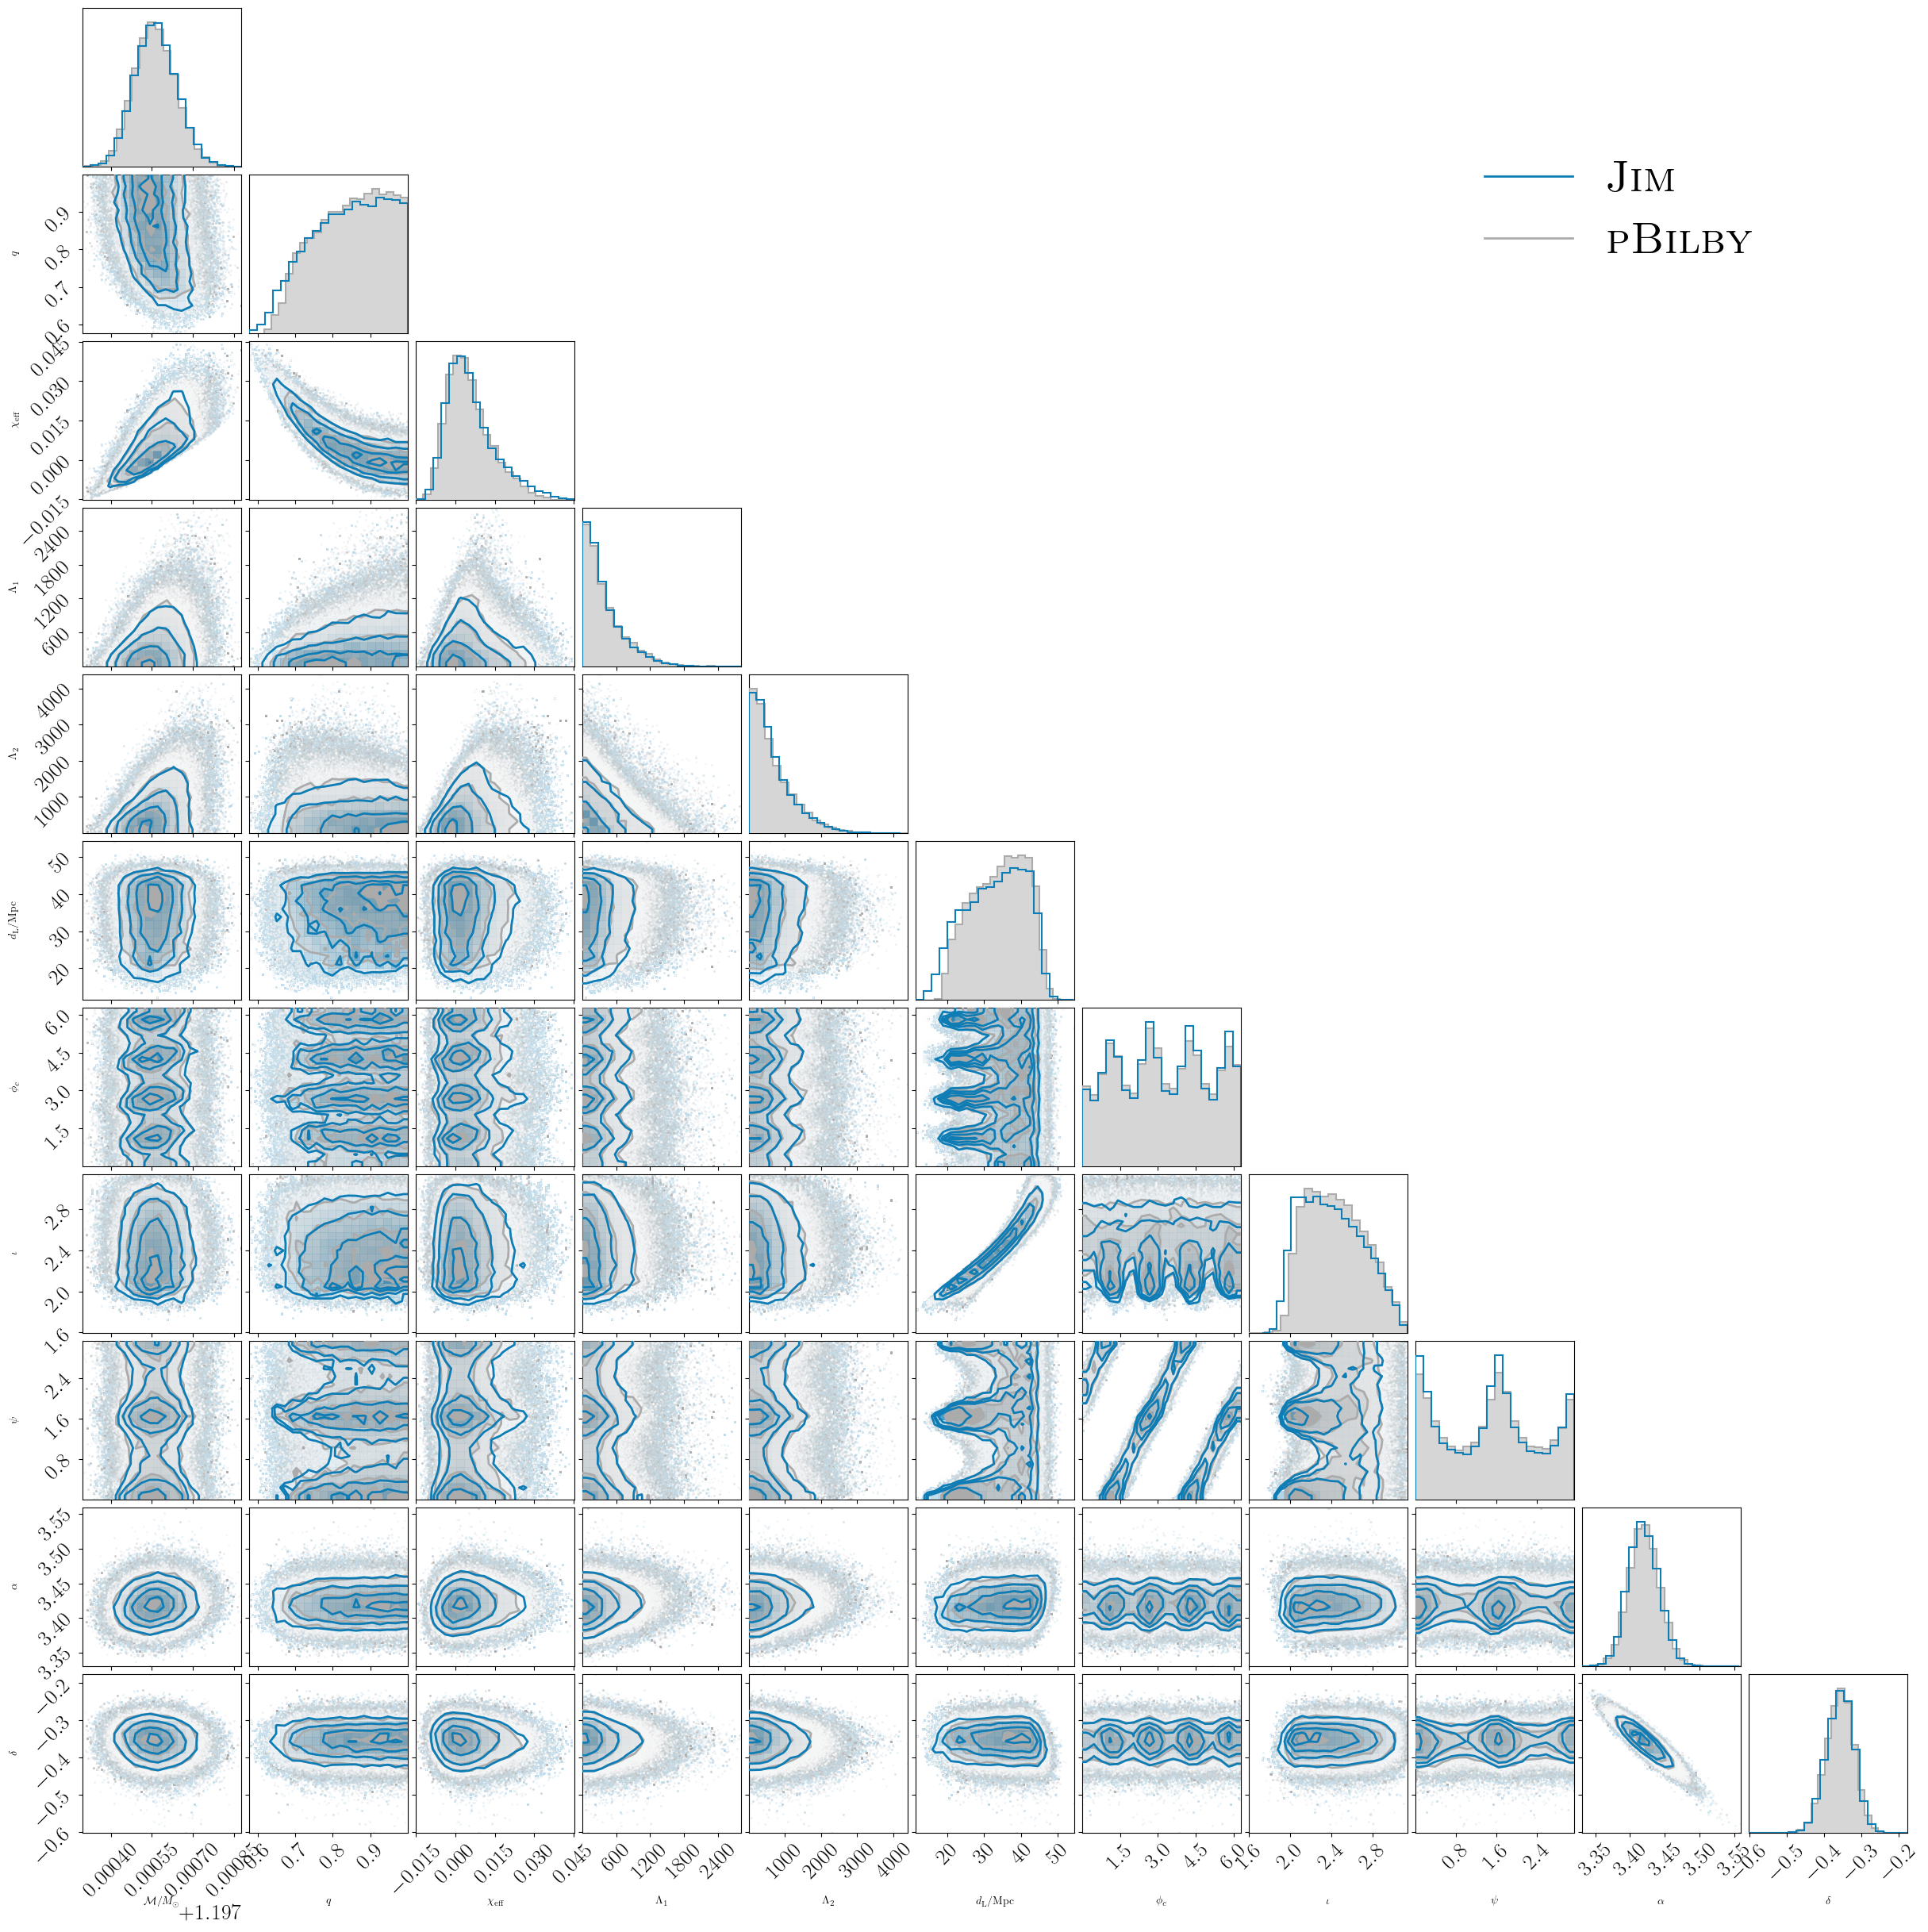

In [23]:
plot_comparison(taper_samples, 
                no_taper_samples, 
                idx_list,
                use_weights=False, 
                save=False)

In [17]:
### Hacking my way

# # Downsample the data
# jump = 100
# taper_samples = taper_samples[::jump]
# no_taper_samples = no_taper_samples[::jump]

# fig = corner.corner(taper_samples, color = "red", label = "With taper", labels = jim_naming)
# corner.corner(no_taper_samples, fig = fig, color = "blue", label = "Without taper", labels = jim_naming)
# plt.legend()
# plt.show()

## JS divergences

In [15]:
js_dict = get_JS_values(taper_samples, no_taper_samples)
js_dict

{'M_c': 0.004197198753274006,
 'q': 0.010776256470315297,
 's1_z': 0.0019000913046855208,
 's2_z': 0.003436806487505106,
 'lambda_1': 0.007444016301119517,
 'lambda_2': 0.002320181702479815,
 'd_L': 0.026418408759031793,
 'phase_c': 0.0033823473347237196,
 'cos_iota': 0.016118505966897418,
 'psi': 0.00359827490256107,
 'ra': 0.0043283321930713435,
 'sin_dec': 0.0018597939594488025}